Загрузить данные: 'insurance.csv'. Вывести и провести предобработку. Вывести список уникальных регионов.

In [1]:
import pandas as pd
data = pd.read_csv('insurancee.csv', sep=',')
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Проверим, как выглядят вещественные столбцы в таблице.
Количество знаков после запятой разное, приведем их к однородному виду, округлив до 3 знаков после запятой. 

In [3]:
print(df.charges.unique())

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [4]:
print(df.bmi.unique())

[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  33.915 28.785 28.3   37.4   17.765 34.7   26.505
 22.04  35.9   25.555 28.05  25.175 31.9   36.    32.49  25.3   29.735
 38.83  30.495 37.73  37.43  24.13  37.145 39.52  24.42  27.83  36.85
 39.6   29.8   29.64 

In [5]:
print(df.smoker.unique())

['yes' 'no']


In [6]:
print(df.region.unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [7]:
df = df.round({'bmi': 3, 'charges': 3})
df['smoker'] =  df['smoker'].apply(lambda x: x.replace('yes', '1').replace('no','0')).astype('int64')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.924
1,18,male,33.770,1,0,southeast,1725.552
2,28,male,33.000,3,0,southeast,4449.462
3,33,male,22.705,0,0,northwest,21984.471
4,32,male,28.880,0,0,northwest,3866.855
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.548
1334,18,female,31.920,0,0,northeast,2205.981
1335,18,female,36.850,0,0,southeast,1629.834
1336,21,female,25.800,0,0,southwest,2007.945


In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates(ignore_index = True)
print(df.duplicated().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.2+ KB


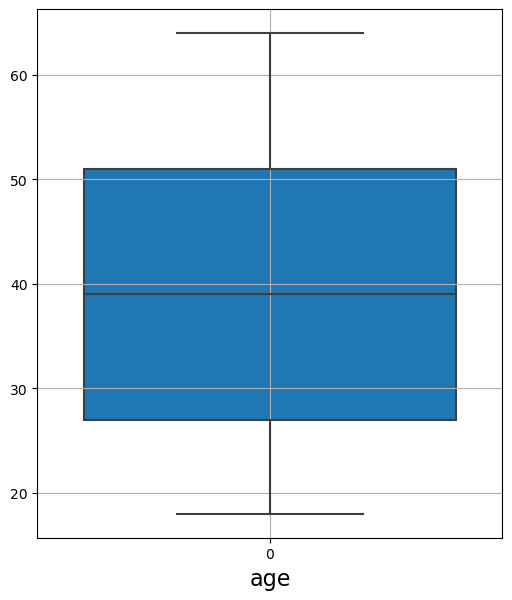

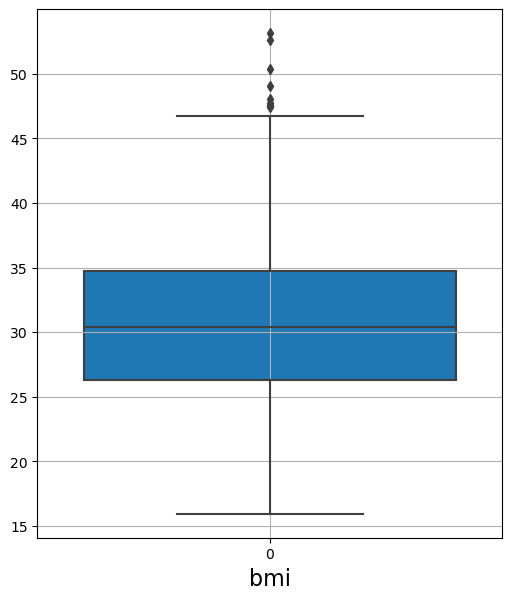

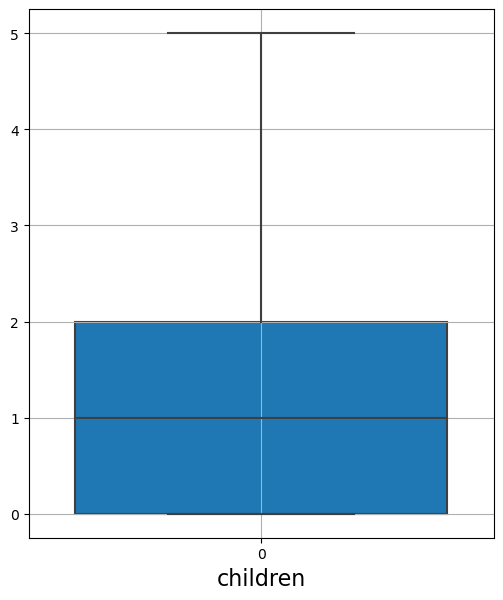

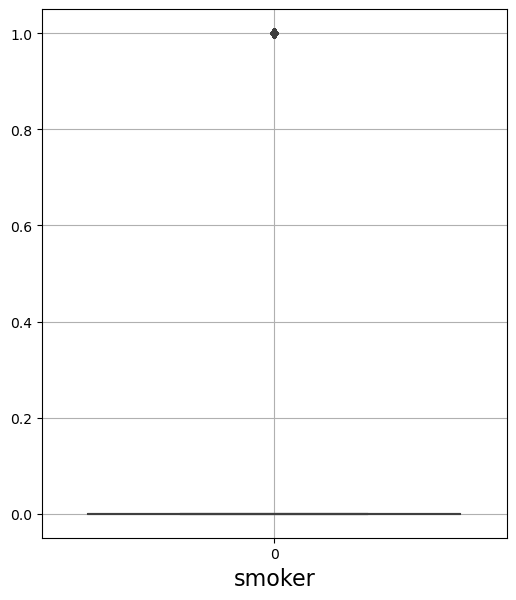

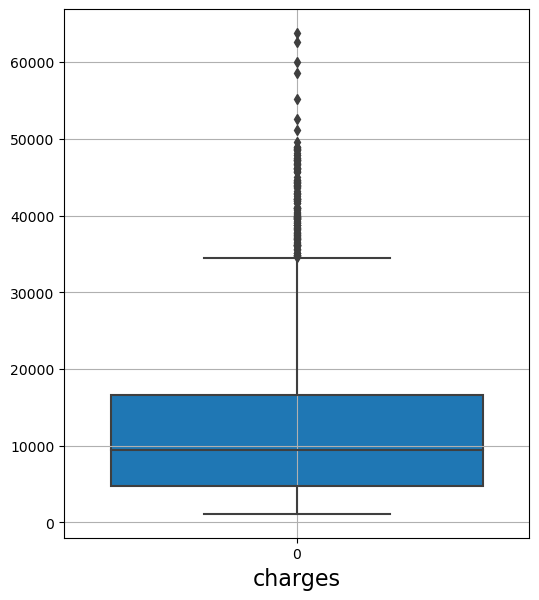

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

    

df2 = df.select_dtypes(include=['int64','float64'])
for column in df2.columns:
    plt.figure(figsize=(6,7), dpi = 100)
    sns.boxplot(data = df2[column], linewidth = 1.5, saturation =1)
    plt.xlabel(column, fontsize = 16)
    plt.grid()
    plt.show()

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.924
1,18,male,33.770,1,0,southeast,1725.552
2,28,male,33.000,3,0,southeast,4449.462
3,33,male,22.705,0,0,northwest,21984.471
4,32,male,28.880,0,0,northwest,3866.855
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,0,northwest,10600.548
1333,18,female,31.920,0,0,northeast,2205.981
1334,18,female,36.850,0,0,southeast,1629.834
1335,21,female,25.800,0,0,southwest,2007.945


In [15]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# data2 = scaler.fit_transform(df)
# data2
import numpy as np
from sklearn import preprocessing

x_array = np.array(df['bmi'])
normalized_arr = preprocessing.normalize([x_array]).reshape(-1)

print(normalized_arr)

[0.02440588 0.02954074 0.02886717 ... 0.03223501 0.02256888 0.02542936]


Выполнить однофакторный ANOVA тест, чтобы проверить влияние 
региона на индекс массы тела (BMI), используя первый способ, через 
библиотеку Scipy.Нулевая гипотеза обычно говорит о равенстве средних двух групп, альтернативная – о различии средних (двусторонний тест) или различии в определенном направлении (односторонний тест).

In [18]:
import scipy.stats as sts
import numpy as np
from sklearn import preprocessing as pr

x_array = np.array(df['bmi'])
normal_bmi = pr.normalize([x_array]).reshape(-1)
reg = df['region'].values.reshape(-1)

r_fr=pd.DataFrame({"region":reg, "bmi": normal_bmi})
group=r_fr.groupby("region").groups
southwest=df.bmi[group["southwest"]]
southeast=df.bmi[group["southeast"]]
northwest=df.bmi[group["northwest"]]
northeast=df.bmi[group["northeast"]]
sts.f_oneway(southwest,southeast,northwest,northeast)

F_onewayResult(statistic=39.48593864487439, pvalue=1.9087293927440606e-24)

Нулевую гипотезу можно отклонить, следовательно, результат теста говорит о наличии влияния региона на ИМТ.

Выполнить однофакторный ANOVA тест, чтобы проверить влияние региона на индекс массы тела (BMI), используя второй способ, с помощью функции anova_lm() из библиотеки statsmodels.

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('bmi ~ region', data = r_fr).fit()
result = sm.stats.anova_lm(model, typ = 2)
result

,sum_sq,df,F,PR(>F)
region,0.003105,3.0,39.485939,1.908729e-24
Residual,0.034941,1333.0,NaN,NaN


С помощью t критерия Стьюдента перебрать все пары. Определить поправку Бонферрони.
Можно использовать t критерий Стьюдента для всех пар регионов, но такой метод при большом разнообразии групп может дать слишком большую ошибку. Метод Бонферрони является одним из наиболее простых и известных способов контроля над групповой вероятностью ошибки.
Вместо деления изначально принятого уровня значимости на число проверяемых гипотез, можно умножить каждое из исходных Р-значений на это число, затем сравним такие скорректированные с α=0.05.

In [21]:
from math import factorial
region_pairs=[]
regions = df.region.unique()
pairs = factorial(len(df.region.unique()))/ (factorial(len(df.region.unique()) - 2) * factorial(2))
for i in range (3):
    for j in range (i+1, 4):
        region_pairs.append((regions[i], regions[j]))
for i,j in  region_pairs:
    print(i,j)
    aa=sts.ttest_ind(df.bmi[group[i]], df.bmi[group[j]]).pvalue*pairs
    if (aa > 0.05):
        print (aa/6, "принимается")
    else:
        print (aa/6, "отклоняется")

southwest southeast
5.437400963968064e-09 отклоняется
southwest northwest
0.0010577505931067947 отклоняется
southwest northeast
0.0019086161671573072 отклоняется
southeast northwest
2.7504255547794223e-19 отклоняется
southeast northeast
1.186014937424813e-17 отклоняется
northwest northeast
0.9598300701853016 принимается


Видим, что различия в ИМТ есть у следующих пар регионов: southwest-southeast, southwest-northwest, southwest-northeast, southeast-northwest и southeast-northeast. Эти результаты говорят о том, что ИМТ всех пересечений регионов, кроме северных, имеет отличие от остальных.

Выполнить пост-хок тесты Тьюки и построить график.
Пост-хок тесты предназначены для решения задачи определения различий между группами изучаемого фактора, которые оказывают значимое влияние на данные.

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,0.0,1.0,-0.001,0.0011,False
northeast,southeast,0.0037,-0.0,0.0027,0.0047,True
northeast,southwest,0.0012,0.0107,0.0002,0.0023,True
northwest,southeast,0.0036,-0.0,0.0026,0.0046,True
northwest,southwest,0.0012,0.0125,0.0002,0.0023,True
southeast,southwest,-0.0024,0.0,-0.0034,-0.0014,True


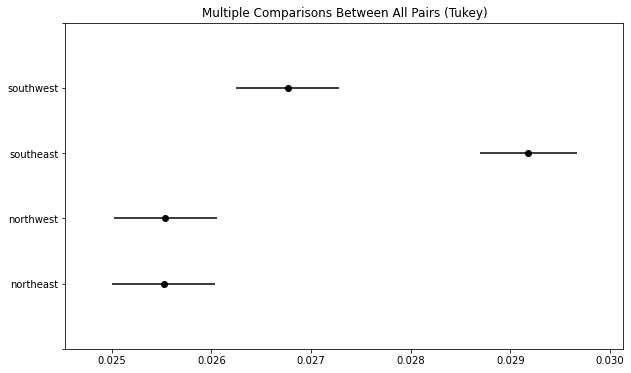

In [17]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog =normal_bmi , groups = reg , alpha = 0.05)
tukey.plot_simultaneous()
tukey.summary()

Результаты аналогичны полученным через сравнения p-значения с поправкой Бонферрони. Видим, что доверительные интервалы northwest-northeast перекрываются, поэтому пост-хок тесты показали что различия между ними не существенные.

Выполнить двухфакторный ANOVA тест, чтобы проверить влияние 
региона и пола на индекс массы тела (BMI), используя функцию anova_lm() 
из библиотеки statsmodels.

In [18]:
df3 = df[['sex', 'region', 'bmi']].copy()
model = ols('bmi ~ C(sex) + C(region) + C(sex):C(region)', data = df3).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
C(sex),85.359929,1.0,2.498643,1.141824e-01
C(region),4036.141807,3.0,39.381780,2.215903e-24
C(sex):C(region),175.040197,3.0,1.707917,1.635099e-01
Residual,45401.980965,1329.0,NaN,NaN


Р-значения поля sex и совокупности полей sex:region не меньше 0.05, следовательно влияние пола на ИМТ статистически не значимо, и значительный эффект взаимодействия между полом и регионом отсутствует. Напротив, р-значение для поля region меньше 0.05, что означает влияние этого фактора на ИМТ.

In [19]:
df3

,sex,region,bmi
0,female,southwest,27.900
1,male,southeast,33.770
2,male,southeast,33.000
3,male,northwest,22.705
4,male,northwest,28.880
...,...,...,...
1332,male,northwest,30.970
1333,female,northeast,31.920
1334,female,southeast,36.850
1335,female,southwest,25.800


Выполнить пост-хок тесты Тьюки и построить график.

group1,group2,meandiff,p-adj,lower,upper,reject
female / northeast,female / northwest,-0.0464,1.0,-2.0149,1.9222,False
female / northeast,female / southeast,3.3469,0.0,1.4093,5.2846,True
female / northeast,female / southwest,0.7362,0.9498,-1.2384,2.7107,False
female / northeast,male / northeast,-0.2998,0.9998,-2.2713,1.6718,False
female / northeast,male / northwest,-0.2133,1.0,-2.194,1.7674,False
female / northeast,male / southeast,4.6657,0.0,2.7627,6.5686,True
female / northeast,male / southwest,1.8051,0.101,-0.1664,3.7767,False
female / northwest,female / southeast,3.3933,0.0,1.4649,5.3217,True
female / northwest,female / southwest,0.7825,0.9295,-1.1829,2.748,False
female / northwest,male / northeast,-0.2534,0.9999,-2.2159,1.709,False


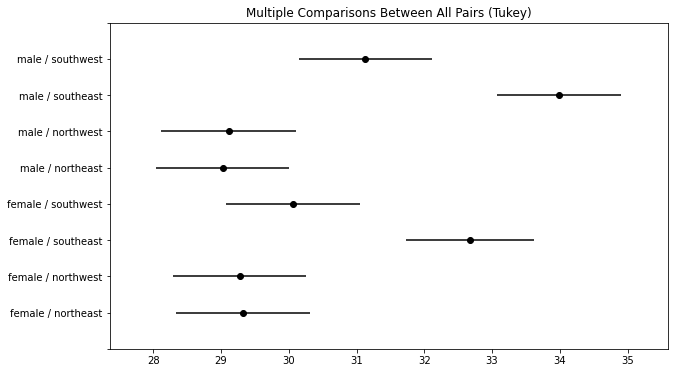

In [20]:
df3['combo']=df3.sex + " / "+ df3.region
tukey = pairwise_tukeyhsd(endog =df3.bmi, groups = df3.combo , alpha = 0.05)
tukey.plot_simultaneous()
tukey.summary()

Те доверительные интервалы, которые не перекрываются и обозначены в таблице как True оказывают влияние на данные. 